In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load in large dataset
Truth = pd.read_csv('../Benchmarking/Averaged_data/08-03_bdE_scores.csv')

<Figure size 1000x600 with 0 Axes>

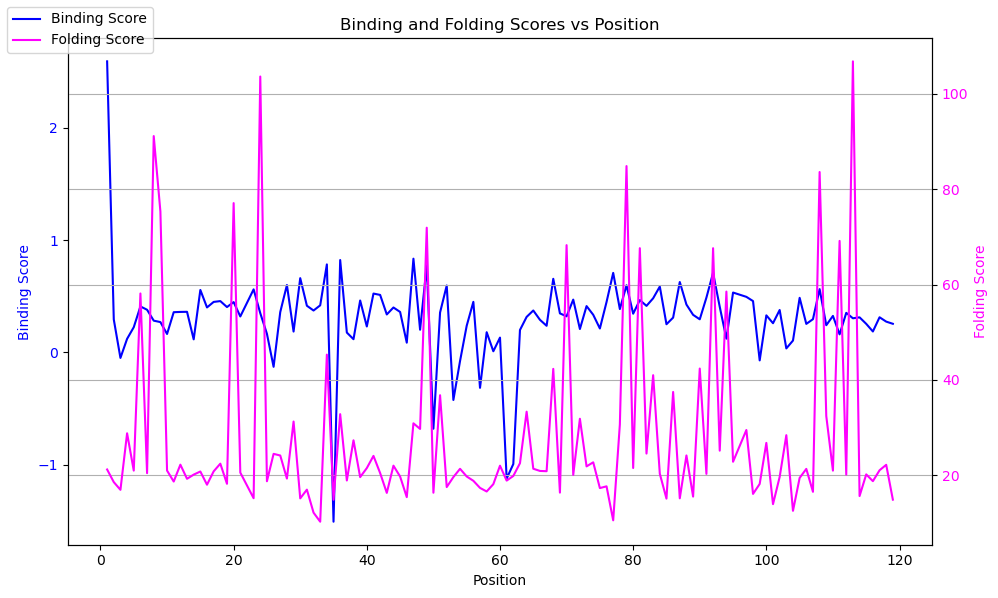

In [ ]:
plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(Truth['Position'], Truth['Energy Score'], label='Binding Score', color='blue')
# ax1.plot(Truth['Position'], Truth['Energy Score'].min() * np.ones(len(Truth['Position'])), label='Lowest Binding Score (Averaged)', color='green', linestyle='--')

ax2 = ax1.twinx()
ax2.plot(Truth['Position'], Truth['Folded Energy Delta'], label='Folding Score', color='magenta')
# ax2.plot(Truth['Position'], Truth['Folded Energy Delta'].min() * np.ones(len(Truth['Position'])), label='Lowest Incorporation Score (Averaged)', color='purple', linestyle='--')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='magenta')
ax1.set_xlabel('Position')
ax1.set_ylabel('Binding Score', color='blue')
ax2.set_ylabel('Folding Score', color='magenta')
ax1.set_title('Binding and Folding Scores vs Position')
fig.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig('BandF_TrueScores.png')

In [2]:
#Load in optimization datasets
random = pd.read_csv('../Benchmarking/AcqFunctions/08_14_BayesOpt_RANDOM_60runs.csv')
ucb = pd.read_csv('../Benchmarking/AcqFunctions/08_14_BayesOpt_UCB_60runs.csv')
di_ucb = pd.read_csv('../Benchmarking/AcqFunctions/08_14_BayesOpt_PI_UCBPI_60runs.csv')

In [3]:
def add_index(df):
    df['Trial'] = np.arange(len(df))
    return df

In [3]:
def grouping(df):
    # df = df.sort_values(by=["Trial"])
    round_matrix = []
    for i in range(len(df)//5):
        round_matrix.append(np.array(df.iloc[i*20:(i+1)*20]))
    return round_matrix
def round_median(rounds):
    medians = []
    for round in rounds:
        medians.append(np.median(round))
    return medians
def round_quartile(rounds):
    t5percentile = []
    t57percentile = []
    for round in rounds:
        t5percentile.append(np.percentile(round, 25))
        t57percentile.append(np.percentile(round, 75))
    return t5percentile, t57percentile

In [4]:
random = grouping(random)
ucb = grouping(ucb)
di_ucb = grouping(di_ucb)
random2 = round_median(random)
ucb2 = round_median(ucb)
di_ucb2 = round_median(di_ucb)





/Users/nathanphan/anaconda3/envs/ncaa/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nathanphan/anaconda3/envs/ncaa/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[[ 0.00000000e+00  1.10000000e+01 -1.88095005e-01  1.62488415e+01]
 [ 0.00000000e+00  6.10000000e+01 -3.74702495e-01  1.88871035e+01]
 [ 0.00000000e+00  9.80000000e+01 -1.22204360e-01  1.64724058e+01]
 [ 0.00000000e+00  9.30000000e+01 -3.75192423e-03  1.79476221e+01]
 [ 0.00000000e+00  8.00000000e+00 -4.14640847e-01  2.36446222e+01]
 [ 0.00000000e+00  1.19000000e+02 -2.17591204e-01  1.48854894e+01]
 [ 0.00000000e+00  1.15000000e+02 -1.90710434e-01  2.29577882e+01]
 [ 0.00000000e+00  1.16000000e+02 -4.49718062e-02  1.66396843e+01]
 [ 0.00000000e+00  1.04000000e+02 -2.48354718e-01  1.38645053e+01]
 [ 0.00000000e+00  4.10000000e+01  4.13031523e-03  2.07834701e+01]
 [ 0.00000000e+00  1.18000000e+02 -8.12322744e-02  1.89221587e+01]
 [ 0.00000000e+00  4.40000000e+01 -1.50564701e-01  1.75227650e+01]
 [ 0.00000000e+00  1.17000000e+02 -1.37209679e-01  2.03650603e+01]
 [ 0.00000000e+00  1.00000000e+00  2.06330336e+00  2.20976034e+01]
 [ 0.00000000e+00  4.30000000e+01 -8.12293154e-02  1.86398129e

In [5]:
print(random)

[   Run  Points Evaluated  Binding ddG  Folding ddG
0    0                11    -0.188095    16.248842
1    0                61    -0.374702    18.887103
2    0                98    -0.122204    16.472406
3    0                93    -0.003752    17.947622
4    0                 8    -0.414641    23.644622,    Run  Points Evaluated  Binding ddG  Folding ddG
5    0                36    -0.001330    30.374607
6    0                53     0.140329    23.159732
7    0                 2     0.159864    18.341876
8    0                85    -0.230152    10.900968
9    0                50    -1.292424    18.556875,     Run  Points Evaluated  Binding ddG  Folding ddG
10    0               104    -0.132232    14.198949
11    0               117    -0.199762    20.187667
12    0                 6     0.062052    30.303357
13    0                37    -0.266451    18.092624
14    0                56     1.218818    21.054505,     Run  Points Evaluated  Binding ddG  Folding ddG
15    0             

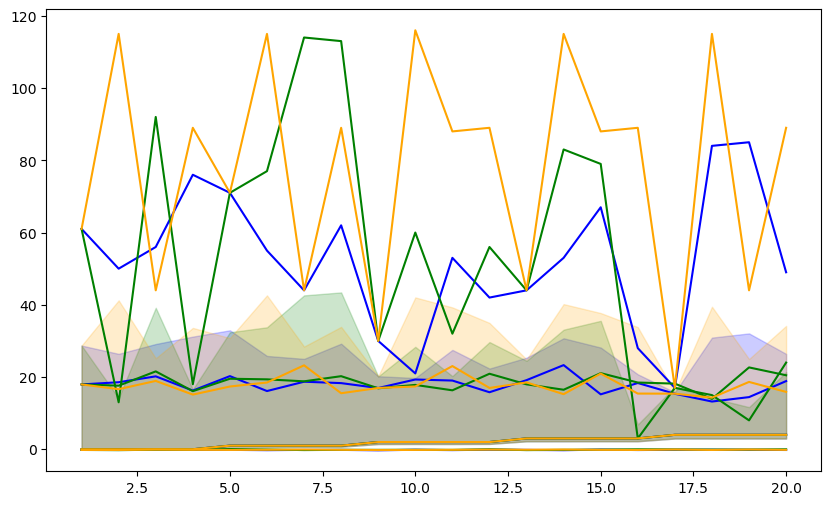

In [7]:
import matplotlib.pyplot as P 
import numpy as N

trial = N.arange(1, len(random)+1)
P.figure(figsize=(10, 6))
P.plot(trial, random, label='Random Binding Score', color='blue')
P.fill_between(trial, random_25, random_75, color='blue', alpha=0.2)
P.plot(trial, ucb, label='UCB Binding Score', color='green')
P.fill_between(trial, ucb_25, ucb_75, color='green', alpha=0.2)
P.plot(trial, di_ucb, label='DI UCB Binding Score', color='orange')
P.fill_between(trial, di_ucb_25, di_ucb_75, color='orange', alpha=0.2)
P.show()

In [8]:
def smallest_points(df):
    binding_list = []
    smallest = df['Binding ddG'][0]
    binding_list.append(smallest)
    for i in range(1,len(df['Binding ddG'])):
        if df['Binding ddG'][i] < binding_list[-1]:
            binding_list.append(df['Binding ddG'][i])
        else:
            binding_list.append(binding_list[-1])
    folding_list = []
    smallest_ddg = df['Folding ddG'][0]
    folding_list.append(smallest_ddg)
    for i in range(1,len(df['Folding ddG'])):
        if df['Folding ddG'][i] < folding_list[-1]:
            folding_list.append(df['Folding ddG'][i])
        else:
            folding_list.append(folding_list[-1])

        
    return np.array(binding_list), np.array(folding_list)

In [9]:
random = add_index(random)
ucb = add_index(ucb)
di_ucb = add_index(di_ucb)

random_binding, random_folding = smallest_points(random)
ucb_binding, ucb_folding = smallest_points(ucb)
di_ucb_binding, di_ucb_folding = smallest_points(di_ucb)

TypeError: list indices must be integers or slices, not str

<Figure size 1000x600 with 0 Axes>

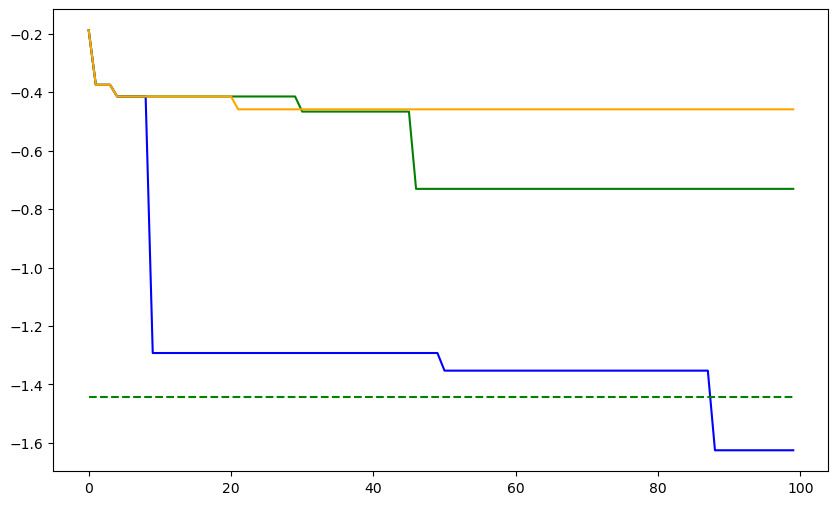

In [ ]:
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(random['Trial'], random_binding, label='Random Binding Score', color='blue')
ax.plot(ucb['Trial'], ucb_binding, label='UCB Binding Score', color='green')
ax.plot(di_ucb['Trial'], di_ucb_binding, label='DI UCB Binding Score', color='orange')
ax.plot(random['Trial'], Truth['Energy Score'].min() * np.ones(len(random['Trial'])), label='Lowest Binding Score (Averaged)', color='green', linestyle='--')
# ax.plot(random['Trial'], random_folding, label='Random Folding Score', color='red')